In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.shape

(768, 9)

In [3]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
null_values = df.isnull().sum()
null_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

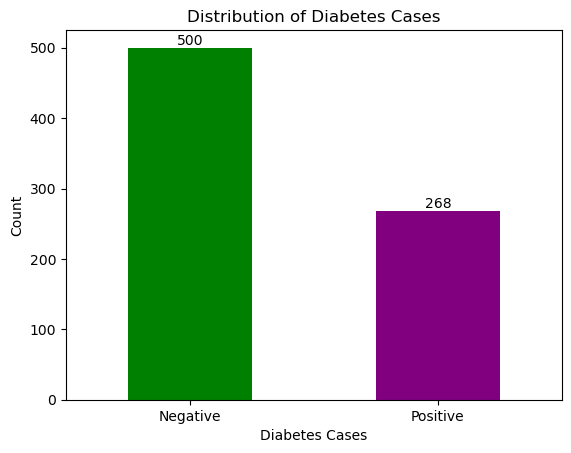

In [6]:
 import matplotlib.pyplot as plt
# Calculate value counts
potability_counts = df['Outcome'].value_counts()

# Create the bar plot
bar_plot = potability_counts.plot(kind="bar", color=["green", "purple"])

# Add labels for each bar
for rect in bar_plot.patches:
    height = rect.get_height()
    bar_plot.text(rect.get_x() + rect.get_width() / 2, height + 0.5, 
                  str(height), ha='center', va='bottom')

# Customize the plot
plt.title("Distribution of Diabetes Cases")
plt.xlabel("Diabetes Cases")
plt.ylabel("Count")
plt.xticks([0,1],['Negative','Positive'], rotation=0)

# Display the plot
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [8]:
# from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

# # define the undersampling method
# undersample = NearMiss(version=2, n_neighbors=4)

# # transform the dataset
# X, y = undersample.fit_resample(X, y)

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(X, y)

from sklearn.model_selection import train_test_split
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, shuffle=True)


In [9]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')
Rfc = RandomForestClassifier()
Knc = KNeighborsClassifier(metric='manhattan', n_neighbors=27, weights= 'distance')

svc.fit(X_train, y_train)
Rfc.fit(X_train, y_train)
Knc.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=27, weights='distance')

In [11]:
y_pred = Rfc.predict(X_test)
y_pred1 = Knc.predict(X_test)
y_pred2 = svc.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
metrics = {
    'Model': ['Random Forest', 'k-Nearest Neighbors', 'Support Vector Machine'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2)],
    'Precision': [precision_score(y_test, y_pred), precision_score(y_test, y_pred1), precision_score(y_test, y_pred2)],
    'Recall': [recall_score(y_test, y_pred), recall_score(y_test, y_pred1), recall_score(y_test, y_pred2)],
    'F1 Score': [f1_score(y_test, y_pred), f1_score(y_test, y_pred1), f1_score(y_test, y_pred2)]
}

# Confusion matrices
cm_rf = confusion_matrix(y_test, y_pred)
cm_knn = confusion_matrix(y_test, y_pred1)
cm_svc = confusion_matrix(y_test, y_pred2)

print("Confusion Matrix (Random Forest):\n", cm_rf)
print("\nConfusion Matrix (k-Nearest Neighbors):\n", cm_knn)
print("\nConfusion Matrix (Support Vector Machine):\n", cm_svc)

# Display the metrics as a DataFrame
results_df = pd.DataFrame(metrics)
print("\nResults:")
print(results_df)


Confusion Matrix (Random Forest):
 [[82 21]
 [10 87]]

Confusion Matrix (k-Nearest Neighbors):
 [[81 22]
 [ 8 89]]

Confusion Matrix (Support Vector Machine):
 [[76 27]
 [18 79]]

Results:
                    Model  Accuracy  Precision    Recall  F1 Score
0           Random Forest     0.845   0.805556  0.896907  0.848780
1     k-Nearest Neighbors     0.850   0.801802  0.917526  0.855769
2  Support Vector Machine     0.775   0.745283  0.814433  0.778325
